# Loading Data-Set

In [68]:
# Dataset loading
import os

dataset = "./New-Dataset/"
# dataset = "./Dataset (Labelled Images)/"
lab_files_path = dataset+"labels/"
# lab_files_path = dataset+"label/"

# total invoice files
files = os.listdir(lab_files_path)


# training set
Batch_1 = files[:30]

Batch_2 = files[30:60]

Batch_3 = files[60:90]

# validation set
valid_set = files[90:95]

# test set
test = files[95:100]

print("Total Label files are: ", len(files))
print("Training Batch-1 files are: ", len(Batch_1))
print("Training Batch-2 files are: ", len(Batch_2))
print("Training Batch-3 files are: ", len(Batch_3))
print("Validation files are: ", len(valid_set))
print("Testing files are: ", len(test))


Total Label files are:  110
Training Batch-1 files are:  30
Training Batch-2 files are:  30
Training Batch-3 files are:  30
Validation files are:  5
Testing files are:  5


# Geometric Algo

In [69]:
from PIL.Image import Image
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from PIL import Image
import networkx as nx

df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G


# Matrices Over Diagonal
Place an incident Matrix over diagonal with existing matrix

In [70]:
from typing import SupportsAbs
from numpy.core.fromnumeric import shape
import numpy as np

# Test Matrices
# mat1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# mat2 = np.array([[3, 2, 1, 7], [6, 5, 4, 9], [9, 8, 7, 4], [1, 5, 7, 2]])


def alignDiagonally(M1, M2, prev_Len):
    for i in range(prev_Len, np.shape(M1)[0]):
        for j in range(prev_Len, np.shape(M1)[0]):
            x = i - prev_Len
            y = j - prev_Len
            M1[i][j] = M2[x][y]

    return M1


def resizeMatrix(M, I):
    oldMat_Len = np.shape(M)[0]
    z = np.zeros((oldMat_Len, np.shape(I)[0]), dtype=np.int64)
    newArray = np.append(M, z, axis=1)
    M = newArray

    # Appending 1D arrays of zeros in the original Matrix
    # (i.e. the matrix in which we want to align othe rmatrices diagonally)
    appZero = np.shape(I)[0]
    x = oldMat_Len + appZero
    L = np.zeros((np.shape(I)[0], x), dtype=np.int64)
    newArray = np.append(M, L, axis=0)
    M = newArray

    M = alignDiagonally(M, I, oldMat_Len)
    return M


# Training Batch-1

In [71]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z_file = lab_files_path + Batch_1[0]
df = pd.read_csv(Z_file)
G = makeGraph(df)
M1 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_1)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_1[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M1 = resizeMatrix(M1, I)

print("Dimentions of Batch 1 matrix is: ", np.shape(M1))



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

# Training Batch-2

In [72]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z1_file = lab_files_path + Batch_2[0]
df = pd.read_csv(Z1_file)
G = makeGraph(df)
M2 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_2)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_2[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M2 = resizeMatrix(M2, I)

print("Dimentions of Batch 2 matrix is: ", np.shape(M2))



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

# Trainig Batch-3

In [73]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z2_file = lab_files_path + Batch_3[0]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
M3 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_3)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_3[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M3 = resizeMatrix(M3, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M3))



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

# Validation Batch

In [74]:
Z3_file = lab_files_path + valid_set[0]
df = pd.read_csv(Z3_file)
G = makeGraph(df)
M4 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(valid_set)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + valid_set[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M4 = resizeMatrix(M4, I)

print("Dimentions of Validation matrix is: ", np.shape(M4))



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4
Dimentions of Validation matrix is:  (1052, 1052)


# Testing Batch

In [75]:
Z4_file = lab_files_path + test[0]
df = pd.read_csv(Z4_file)
G = makeGraph(df)
M5 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(test)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + test[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M5 = resizeMatrix(M5, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M5))



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4
Dimentions of Batch 3 matrix is:  (1012, 1012)


# Saving Matrices

In [76]:
print("Saving Matrix")
# np.save("./Matrices/Matrix_b1.npy", M1)
np.save("./IDS Model File Matrices/Train_B1.npy", M1)
np.save("./IDS Model File Matrices/Train_B2.npy", M2)
np.save("./IDS Model File Matrices/Train_B3.npy", M3)
np.save("./IDS Model File Matrices/Validation.npy", M4)
np.save("./IDS Model File Matrices/Test.npy", M5)


Saving Matrix


# Loading Training Matrix

In [115]:
import numpy as np

A1 = np.load("./IDS Model File Matrices/Train_B1.npy")
A2 = np.load("./IDS Model File Matrices/Train_B2.npy")
A3 = np.load("./IDS Model File Matrices/Train_B3.npy")
A4 = np.load("./IDS Model File Matrices/Validation.npy")
A5 = np.load("./IDS Model File Matrices/Test.npy")

print("Printing Training Batch_1")
print(A1)
print(np.shape(A1))
print("Printing Training Batch_2")
print(A2)
print(np.shape(A2))
print("Printing Training Batch_3")
print(A3)
print(np.shape(A3))
print("Printing Validation Batch")
print(A4)
print(np.shape(A4))
print("Printing Test Batch")
print(A5)
print(np.shape(A5))


Printing Training Batch_1
[[1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
(3718, 3718)
Printing Training Batch_2
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(3680, 3680)
Printing Training Batch_3
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(3960, 3960)
Printing Validation Batch
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1052, 1052)
Printing Test Batch
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(1012, 1012)


# Checking Train Matrix

(3718, 3718)


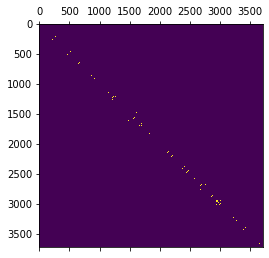

In [78]:
import matplotlib.pyplot as plt
plt.matshow(A1)
print(np.shape(A1))


# Generating Labels

In [79]:
from numpy import nan


def returnLabels(direc, files):
    train_text = []
    labels = []
    for f in range(len(files)):
        seenList = []
        df = pd.read_csv(direc + files[f])
        text = df['Object'].to_list()
        T_labels = df['labels'].to_list()

        for i in range(len(text)):
            if(text[i] not in seenList):
                labels.append(T_labels[i])
                train_text.append(text[i])
            seenList.append(text[i])

    return labels, train_text


# Encoding Labels
1. Get a list of labels from CSV files.
2. Catagorically encode the labels 

In [96]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

b1_labels, b1_text = returnLabels(lab_files_path, Batch_1)
print("Total train labels are: ", len(b1_labels))
print("Total train text is: ", len(b1_text))

lab_encoder = LabelEncoder()
b1_encodings = lab_encoder.fit_transform(b1_labels)
print("Total train encodings are: ", len(b1_encodings))


uni_b1_enc = set(b1_encodings)
print("Unique train encodings are: ", uni_b1_enc)
print("=============================================")

b2_labels, b2_text = returnLabels(lab_files_path, Batch_2)
print("Total train labels are: ", len(b2_labels))
print("Total train text is: ", len(b2_text))

lab_encoder = LabelEncoder()
b2_encodings = lab_encoder.fit_transform(b2_labels)
print("Total train encodings are: ", len(b2_encodings))


uni_b2_enc = set(b2_encodings)
print("Unique train encodings are: ", uni_b2_enc)
print("=============================================")

b3_labels, b3_text = returnLabels(lab_files_path, Batch_3)
print("Total train labels are: ", len(b3_labels))
print("Total train text is: ", len(b3_text))

lab_encoder = LabelEncoder()
b3_encodings = lab_encoder.fit_transform(b3_labels)
print("Total train encodings are: ", len(b3_encodings))


uni_b3_enc = set(b3_encodings)
print("Unique train encodings are: ", uni_b3_enc)
print("=============================================")


valid_labels, valid_text = returnLabels(lab_files_path, valid_set)
print("Total validation labels are: ", len(valid_labels))

lab_encoder = LabelEncoder()
valid_encodings = lab_encoder.fit_transform(valid_labels)
print("Total train encodings are: ", len(valid_encodings))


uni_valid_enc = set(valid_encodings)
print("Unique validation encodings are: ", uni_valid_enc)
print("=============================================")


Total train labels are:  3718
Total train text is:  3718
Total train encodings are:  3718
Unique train encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Total train labels are:  3680
Total train text is:  3680
Total train encodings are:  3680
Unique train encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Total train labels are:  3960
Total train text is:  3960
Total train encodings are:  3960
Unique train encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Total validation labels are:  1052
Total train encodings are:  1052
Unique validation encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Deep Learning Libraries

In [81]:
# from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2


from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GCNConv
from sklearn.metrics import classification_report
from spektral.utils import normalized_laplacian
from spektral.utils.sparse import sp_matrix_to_sp_tensor

import matplotlib.pyplot as plt
print("Libraries Imported..")


Libraries Imported..


# Model Hyperparameters

In [82]:
# Hyper-parameters
channels = 32
dropout = 0.5
learning_rate = 5e-4
l2_reg = 0.001
batch_size = 16
es_patience = 10


# Embeddings for train matrix

In [91]:
from gensim.models import Word2Vec
Emb_Model = "./Models/Word2Vec_Model.bin"
Loaded_model = Word2Vec.load(Emb_Model)

train_embeddings = []
for t in b1_text:
    train_embeddings.append(Loaded_model.wv[t])
    
print(len(train_embeddings))
    
print("Total train test is: ", len(b1_text))


3718
Total train test is:  3718


# Model Definition

In [92]:

N = A1.shape[0]
F = np.shape(train_embeddings)[1]
train_embeddings = np.array(train_embeddings)
print(F)

classes = len(set(b1_text))
print("Total classes are: ", classes)

# X_in = Input(batch_size=N, shape=(F))
X_in = Input(batch_size=None, shape=(F,))
print("Shape of X-in is: ", np.shape(X_in))

# A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr), sparse=True)
# A_in = Input(shape=(None,), sparse=True)
A_in = Input(shape=(None,))
print("Shape of A-in is: ", np.shape(A_in))

# D1 = Dropout(dropout)(X_in)
# G1 = GCNConv(channels, activation='LeakyReLU',
            #  kernel_regularizer=l2(l2_reg), use_bias=True)([X_in, A_in])
G1 = GCNConv(channels, activation='LeakyReLU')([X_in, A_in])
# D2 = Dropout(dropout)(G1)
# G2 = GCNConv(channels, activation='LeakyReLU',
#              kernel_regularizer=l2(l2_reg), use_bias=True)([G1, A_in])
G2 = GCNConv(channels, activation='LeakyReLU')([G1, A_in])

# # BN = BatchNormalization()(G2)
flatten = Flatten()(G2)

D1 = Dense(128, activation='relu')(flatten)
Dr1 = Dropout(dropout)(D1)
D2 = Dense(32, activation='relu')(Dr1)
Dr2 = Dropout(dropout)(D2)
# D3 = Dense(16, activation='LeakyReLU')(D2)

D2_out = Dense(classes, activation='softmax')(Dr2)

model = Model(inputs=[X_in, A_in], outputs=D2_out)
# other loss = sparse_categorical_crossentropy
# model.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])

model.summary()


100
Total classes are:  1211
Shape of X-in is:  (None, 100)
Shape of A-in is:  (None, None)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 gcn_conv_10 (GCNConv)          (None, 32)           3232        ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  


# Training Model

In [93]:
validation_text = []
for i in range(len(valid_set)):
    df = pd.read_csv(lab_files_path+valid_set[i])
    Text = df['Object'].to_list()

    for T in Text:
        validation_text.append(T)


valid_embeddings = []
for t in valid_text:
    valid_embeddings.append(Loaded_model.wv[t])
    
valid_embeddings = np.array(valid_embeddings)

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# print("Shape of A1 is: ", np.shape(A1))
# print("Shape of embeddings is: ", np.shape(train_embeddings))
# print("Shape of train embeddings is: ", np.shape(b1_text))


# print("Shape of A4 is: ", np.shape(A4))
# print("Shape of embeddings is: ", np.shape(valid_embeddings))
# print("Shape of train embeddings is: ", np.shape(valid_text))

history = model.fit([train_embeddings, A1],
                    b1_encodings,
                    epochs=500,
                    batch_size=N,
                    # class_weight=W,
                    validation_data=([valid_embeddings, A4], valid_encodings),
                    # callbacks=[callback]
                    )


Epoch 1/500
1/1 [==============================] - 1s 982ms/step - loss: 7.4984 - acc: 5.3792e-04 - val_loss: 6.8520 - val_acc: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 208ms/step - loss: 7.2495 - acc: 0.0013 - val_loss: 6.7249 - val_acc: 0.0019
Epoch 3/500
1/1 [==============================] - 0s 213ms/step - loss: 7.0650 - acc: 0.0032 - val_loss: 6.6169 - val_acc: 0.0076
Epoch 4/500
1/1 [==============================] - 0s 211ms/step - loss: 6.9371 - acc: 0.0059 - val_loss: 6.5098 - val_acc: 0.0323
Epoch 5/500
1/1 [==============================] - 0s 218ms/step - loss: 6.8112 - acc: 0.0145 - val_loss: 6.3939 - val_acc: 0.0646
Epoch 6/500
1/1 [==============================] - 0s 231ms/step - loss: 6.7145 - acc: 0.0204 - val_loss: 6.2572 - val_acc: 0.0941
Epoch 7/500
1/1 [==============================] - 0s 205ms/step - loss: 6.5697 - acc: 0.0401 - val_loss: 6.0923 - val_acc: 0.1150
Epoch 8/500
1/1 [==============================] - 0s 235ms/step - loss: 6.

# Training on Batch-2

In [106]:
b2_embeddings = []
print(len(b2_text))

for t2 in b2_text:
    b2_embeddings.append(Loaded_model.wv[t2])

b2_embeddings=np.array(b2_embeddings) 
print(np.shape(b2_embeddings))
print(np.shape(A2))


history = model.fit([b2_embeddings, A2],
                    b2_encodings,
                    epochs=500,
                    batch_size=N,
                    # class_weight=W,
                    validation_data=([valid_embeddings, A4], valid_encodings),
                    # callbacks=[callback]
                    )


3680
(3680, 100)
(3680, 3680)
Epoch 1/500
1/1 [==============================] - 1s 692ms/step - loss: 2.1665 - acc: 0.1609 - val_loss: 2.2529 - val_acc: 0.1606
Epoch 2/500
1/1 [==============================] - 0s 222ms/step - loss: 2.1589 - acc: 0.1590 - val_loss: 2.1847 - val_acc: 0.2034
Epoch 3/500
1/1 [==============================] - 0s 234ms/step - loss: 2.1491 - acc: 0.1595 - val_loss: 2.1475 - val_acc: 0.1635
Epoch 4/500
1/1 [==============================] - 0s 231ms/step - loss: 2.1457 - acc: 0.1505 - val_loss: 2.1330 - val_acc: 0.1492
Epoch 5/500
1/1 [==============================] - 0s 231ms/step - loss: 2.1437 - acc: 0.1565 - val_loss: 2.1281 - val_acc: 0.1483
Epoch 6/500
1/1 [==============================] - 0s 219ms/step - loss: 2.1547 - acc: 0.1524 - val_loss: 2.1210 - val_acc: 0.1473
Epoch 7/500
1/1 [==============================] - 0s 228ms/step - loss: 2.1538 - acc: 0.1514 - val_loss: 2.1131 - val_acc: 0.1435
Epoch 8/500
1/1 [==============================] - 0s

# Training Batch-3

In [132]:
b3_embeddings = []
for t3 in b3_text:
    b3_embeddings.append(Loaded_model.wv[t3])

# print(len(b3_embeddings))
b3_embeddings = np.array(b3_embeddings)


print("Shape of A3 is: ", np.shape(A3))
print("Shape of embeddings is: ", np.shape(b3_embeddings))
print("Shape of train encodings is: ", np.shape(b3_encodings))


# history = model.fit([b3_embeddings, A3],
#                     b3_encodings,
#                     epochs=500,
#                     batch_size=N,
#                     # class_weight=W,
#                     validation_data=([valid_embeddings, A4], valid_encodings),
#                     # callbacks=[callback]
#                     )


Shape of A3 is:  (3960, 3960)
Shape of embeddings is:  (3960, 100)
Shape of train encodings is:  (3960,)
Epoch 1/500


InvalidArgumentError:  Matrix size-incompatible: In[0]: [3718,3960], In[1]: [3718,32]
	 [[node model_5/gcn_conv_10/BiasAdd
 (defined at C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\backend.py:6134)
]] [Op:__inference_train_function_87970]

Errors may have originated from an input operation.
Input Source operations connected to node model_5/gcn_conv_10/BiasAdd:
In[0] model_5/gcn_conv_10/MatMul_1 (defined at C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\ops\matmul.py:58)	
In[1] model_5/gcn_conv_10/BiasAdd/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "c:\Users\ahsan\.vscode\extensions\ms-toolsai.jupyter-2021.11.1001550889\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
>>>     runpy.run_module(module, run_name="__main__", alter_sys=False)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\runpy.py", line 210, in run_module
>>>     return _run_code(code, {}, init_globals, run_name, mod_spec)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\ahsan\AppData\Local\Temp/ipykernel_8684/1322795186.py", line 14, in <module>
>>>     history = model.fit([b3_embeddings, A3],
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\conv.py", line 100, in _inner_check_dtypes
>>>     output = [_ for _ in [x, a, e] if _ is not None]
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\gcn_conv.py", line 103, in call
>>>     if self.use_bias:
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\gcn_conv.py", line 104, in call
>>>     output = K.bias_add(output, self.bias)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\backend.py", line 6134, in bias_add
>>>     return tf.nn.bias_add(x, bias, data_format='NHWC')
>>> 